## Plotting

With the following code we can import the power dataset with the correct formatting and then plot it

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

In [2]:
# Dataset import from CSV file
#dataset_P = pd.read_csv('../PowerDataset_pivoted.csv', index_col=0, header=[0, 1], parse_dates=True) # 01/21 dataset
dataset_P = pd.read_csv('../PowerDataset_3_years.csv', index_col=0, parse_dates=True) # 2.5 years dataset
dataset_P

value                                      \
node                                0           1           2           3   
timestamp                                                                   
2021-01-01 00:00:00+00:00  366.222222  403.555556  416.555556  365.444444   
2021-01-01 01:00:00+00:00  369.333333  405.555556  417.000000  362.777778   
2021-01-01 02:00:00+00:00  368.333333  403.666667  417.222222  366.444444   
2021-01-01 03:00:00+00:00  367.888889  402.333333  416.555556  364.111111   
2021-01-01 04:00:00+00:00  369.777778  404.111111  415.777778  363.111111   
...                               ...         ...         ...         ...   
2021-01-31 19:00:00+00:00  434.285714  400.714286  413.571429  362.142857   
2021-01-31 20:00:00+00:00  434.444444  400.000000  412.727273  365.000000   
2021-01-31 21:00:00+00:00  436.170213  400.000000  414.000000  361.666667   
2021-01-31 22:00:00+00:00  436.470588  400.000000  415.294118  362.352941   
2021-01-31 23:00:00+00:00  430.000000  400.000000  406.086957  360.000000   

                                                                           \
node                                4           5           6           7   
timestamp                                                                   
2021-01-01 00:00:00+00:00  439.444444  395.111111  445.666667  421.222222   
2021-01-01 01:00:00+00:00  437.666667  392.555556  444.222222  421.888889   
2021-01-01 02:00:00+00:00  438.000000  394.444444  444.666667  423.444444   
2021-01-01 03:00:00+00:00  437.777778  395.666667  444.111111  422.777778   
2021-01-01 04:00:00+00:00  438.000000  395.888889  444.666667  423.555556   
...                               ...         ...         ...         ...   
2021-01-31 19:00:00+00:00  440.000000  398.571429  445.714286  427.857143   
2021-01-31 20:00:00+00:00  440.000000  396.842105  447.368421  422.857143   
2021-01-31 21:00:00+00:00  440.425532  394.893617  449.777778  423.333333   
2021-01-31 22:00:00+00:00  440.000000  396.470588  448.235294  425.882353   
2021-01-31 23:00:00+00:00  437.000000  398.095238  443.076923  421.428571   

                                                   ...              \
node                                8           9  ...         970   
timestamp                                          ...               
2021-01-01 00:00:00+00:00  420.111111  420.444444  ...  650.111111   
2021-01-01 01:00:00+00:00  420.888889  420.222222  ...  635.888889   
2021-01-01 02:00:00+00:00  421.555556  420.444444  ...  633.222222   
2021-01-01 03:00:00+00:00  421.111111  420.888889  ...  642.888889   
2021-01-01 04:00:00+00:00  422.222222  420.444444  ...  773.000000   
...                               ...         ...  ...         ...   
2021-01-31 19:00:00+00:00  422.962963  420.000000  ...  539.285714   
2021-01-31 20:00:00+00:00  421.000000  420.000000  ...  523.000000   
2021-01-31 21:00:00+00:00  422.083333  420.425532  ...  525.161290   
2021-01-31 22:00:00+00:00  423.529412  422.352941  ...  524.705882   
2021-01-31 23:00:00+00:00  420.869565  420.000000  ...  507.272727   

                                                                           \
node                              971         972         973         974   
timestamp                                                                   
2021-01-01 00:00:00+00:00  458.222222  514.333333  479.888889  459.222222   
2021-01-01 01:00:00+00:00  458.666667  514.666667  482.000000  459.000000   
2021-01-01 02:00:00+00:00  460.333333  512.333333  479.000000  462.444444   
2021-01-01 03:00:00+00:00  458.777778  514.333333  478.777778  457.777778   
2021-01-01 04:00:00+00:00  460.666667  507.555556  481.333333  461.222222   
...                               ...         ...         ...         ...   
2021-01-31 19:00:00+00:00  496.428571  536.428571  459.259259  507.857143   
2021-01-31 20:00:00+00:00  501.666667  535.789474  466.666667  531.578947   
2021-01-31 21:00:00+00:00  506.818182  538.723

We assumed that, in those periods of time in which the samples were null, the system was inactive, which means that inserting 0 as value is a good approximation

In [3]:
# Function that plots a specific node or set of nodes
def showplot(dataset_node, size, label):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.ylabel('W')
    plt.title('Power')
    plt.plot(dataset_node, linewidth=2, label=label)
    plt.legend()
    plt.show

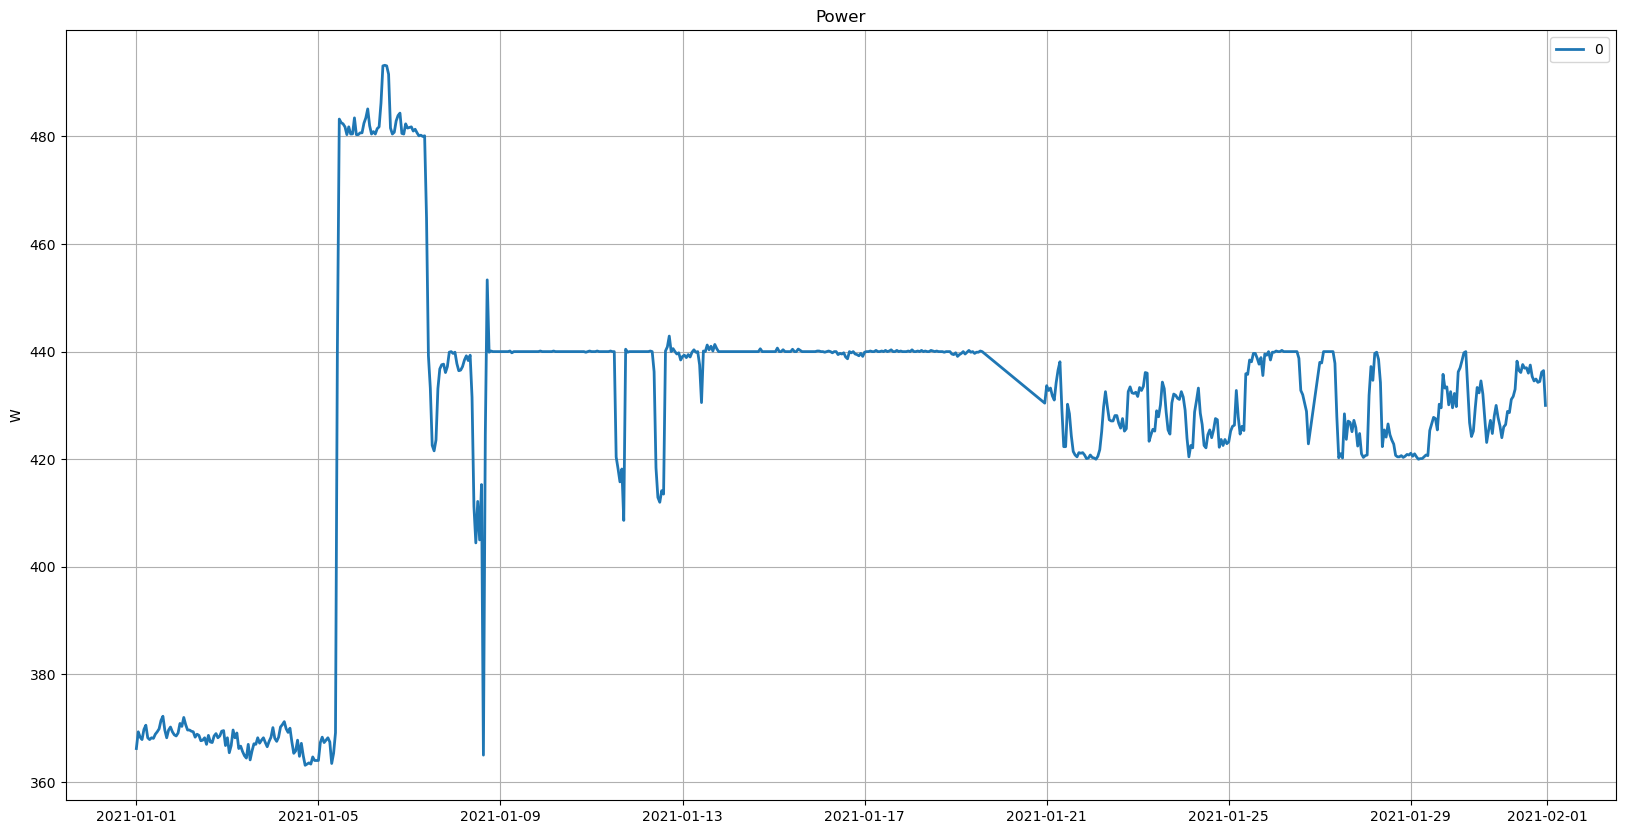

In [5]:
# Plotting specific nodes in time
#showplot(dataset_P['value']['0'], (20,10), '0') # 01/21 dataset
showplot(dataset_P['0'], (20,10), dataset_P.columns[0]) # 2.5 years dataset

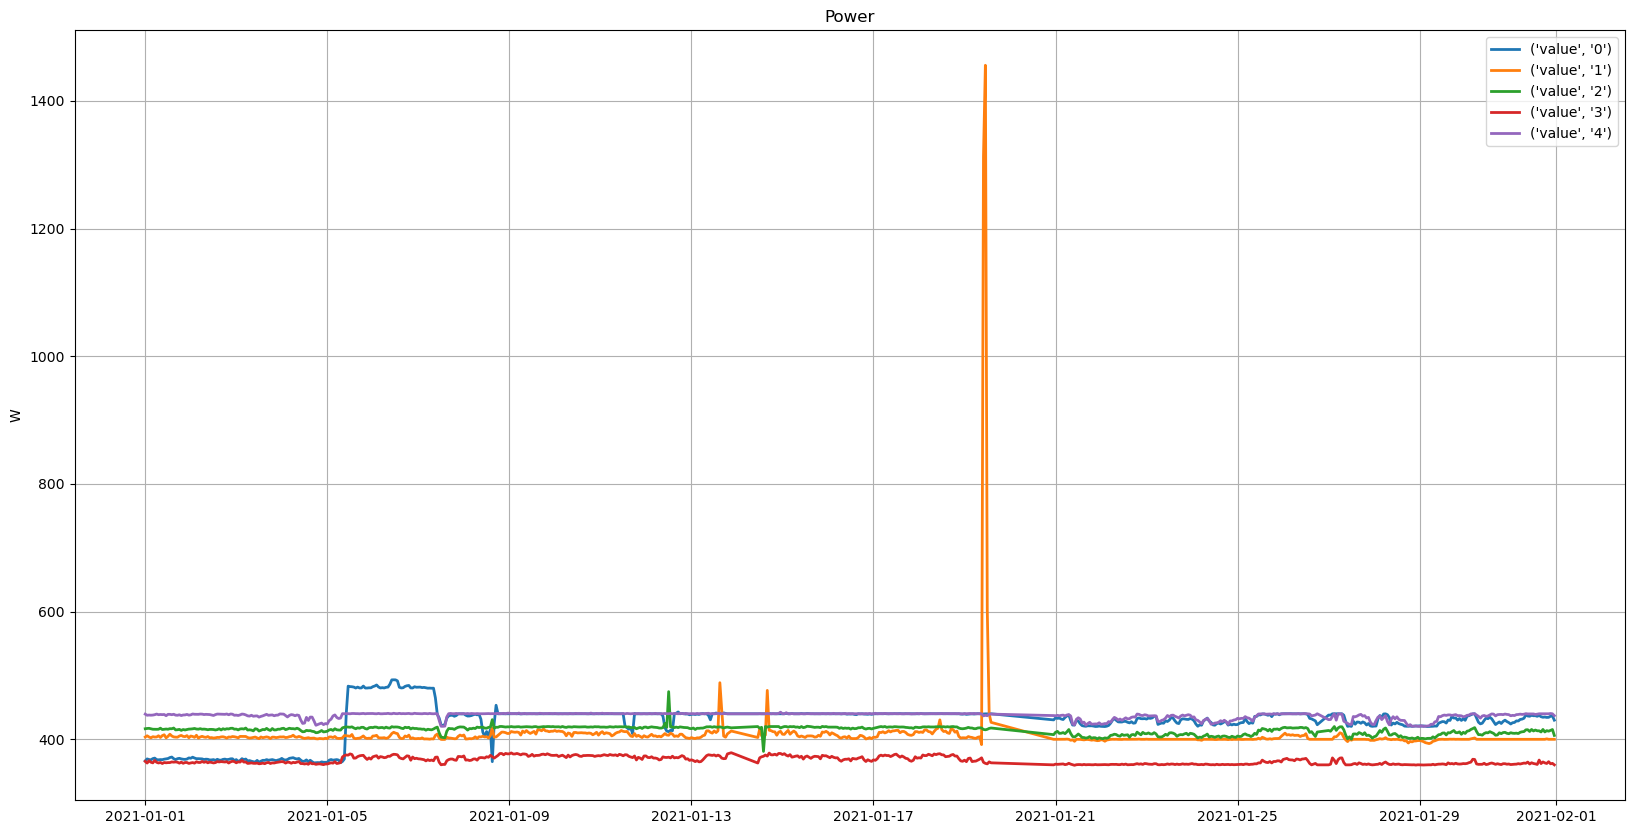

In [6]:
# Plotting a set of nodes in time
#showplot(dataset_P['value'].iloc[:, 0:5], (20,10), dataset_P.columns[0:5] ) # 01/21 dataset
showplot(dataset_P.iloc[:, 0:5], (20,10), dataset_P.columns[0:5]) # 2.5 years dataset

# Plotting a portion in time of the dataset
#showplot(dataset_P.iloc[700:1500, 0], (20,10), dataset_P.columns[0])


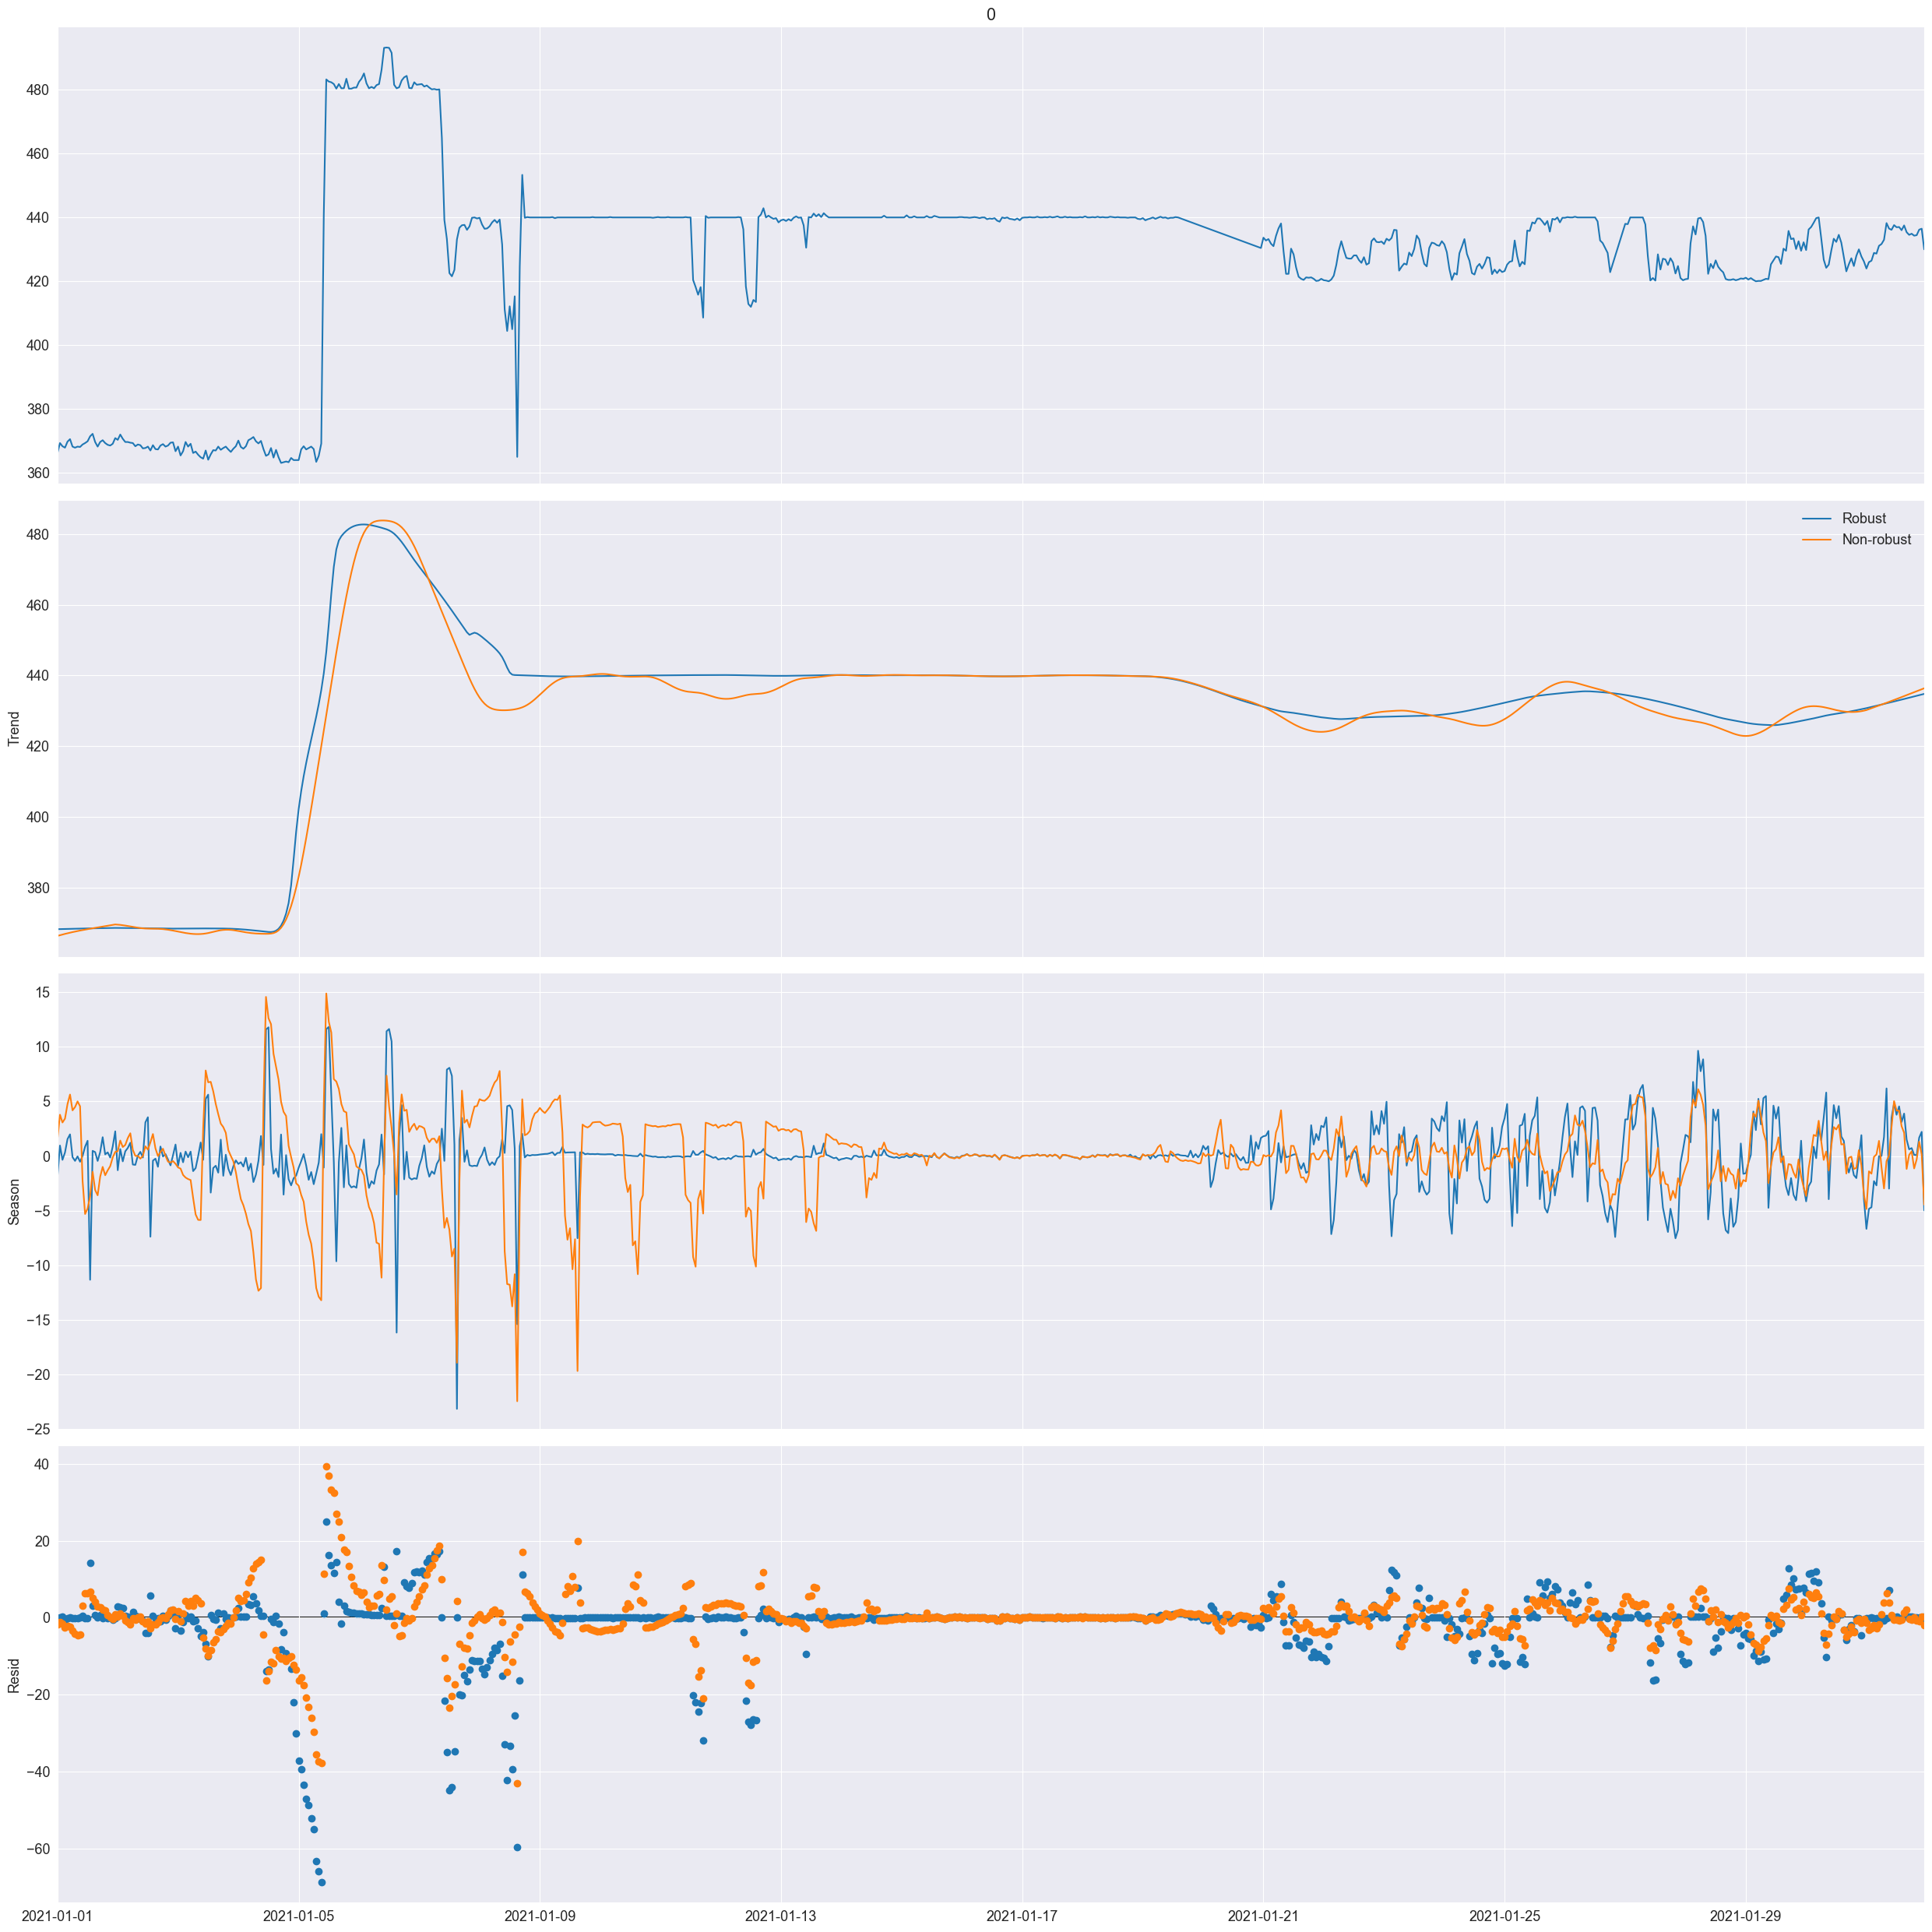

In [7]:
# Seasonal-Trend Decomposition for 01/21 dataset
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_P['value']['0'], period=24, robust=True)  # the period is set to one day
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_P['value']['0'], period=24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

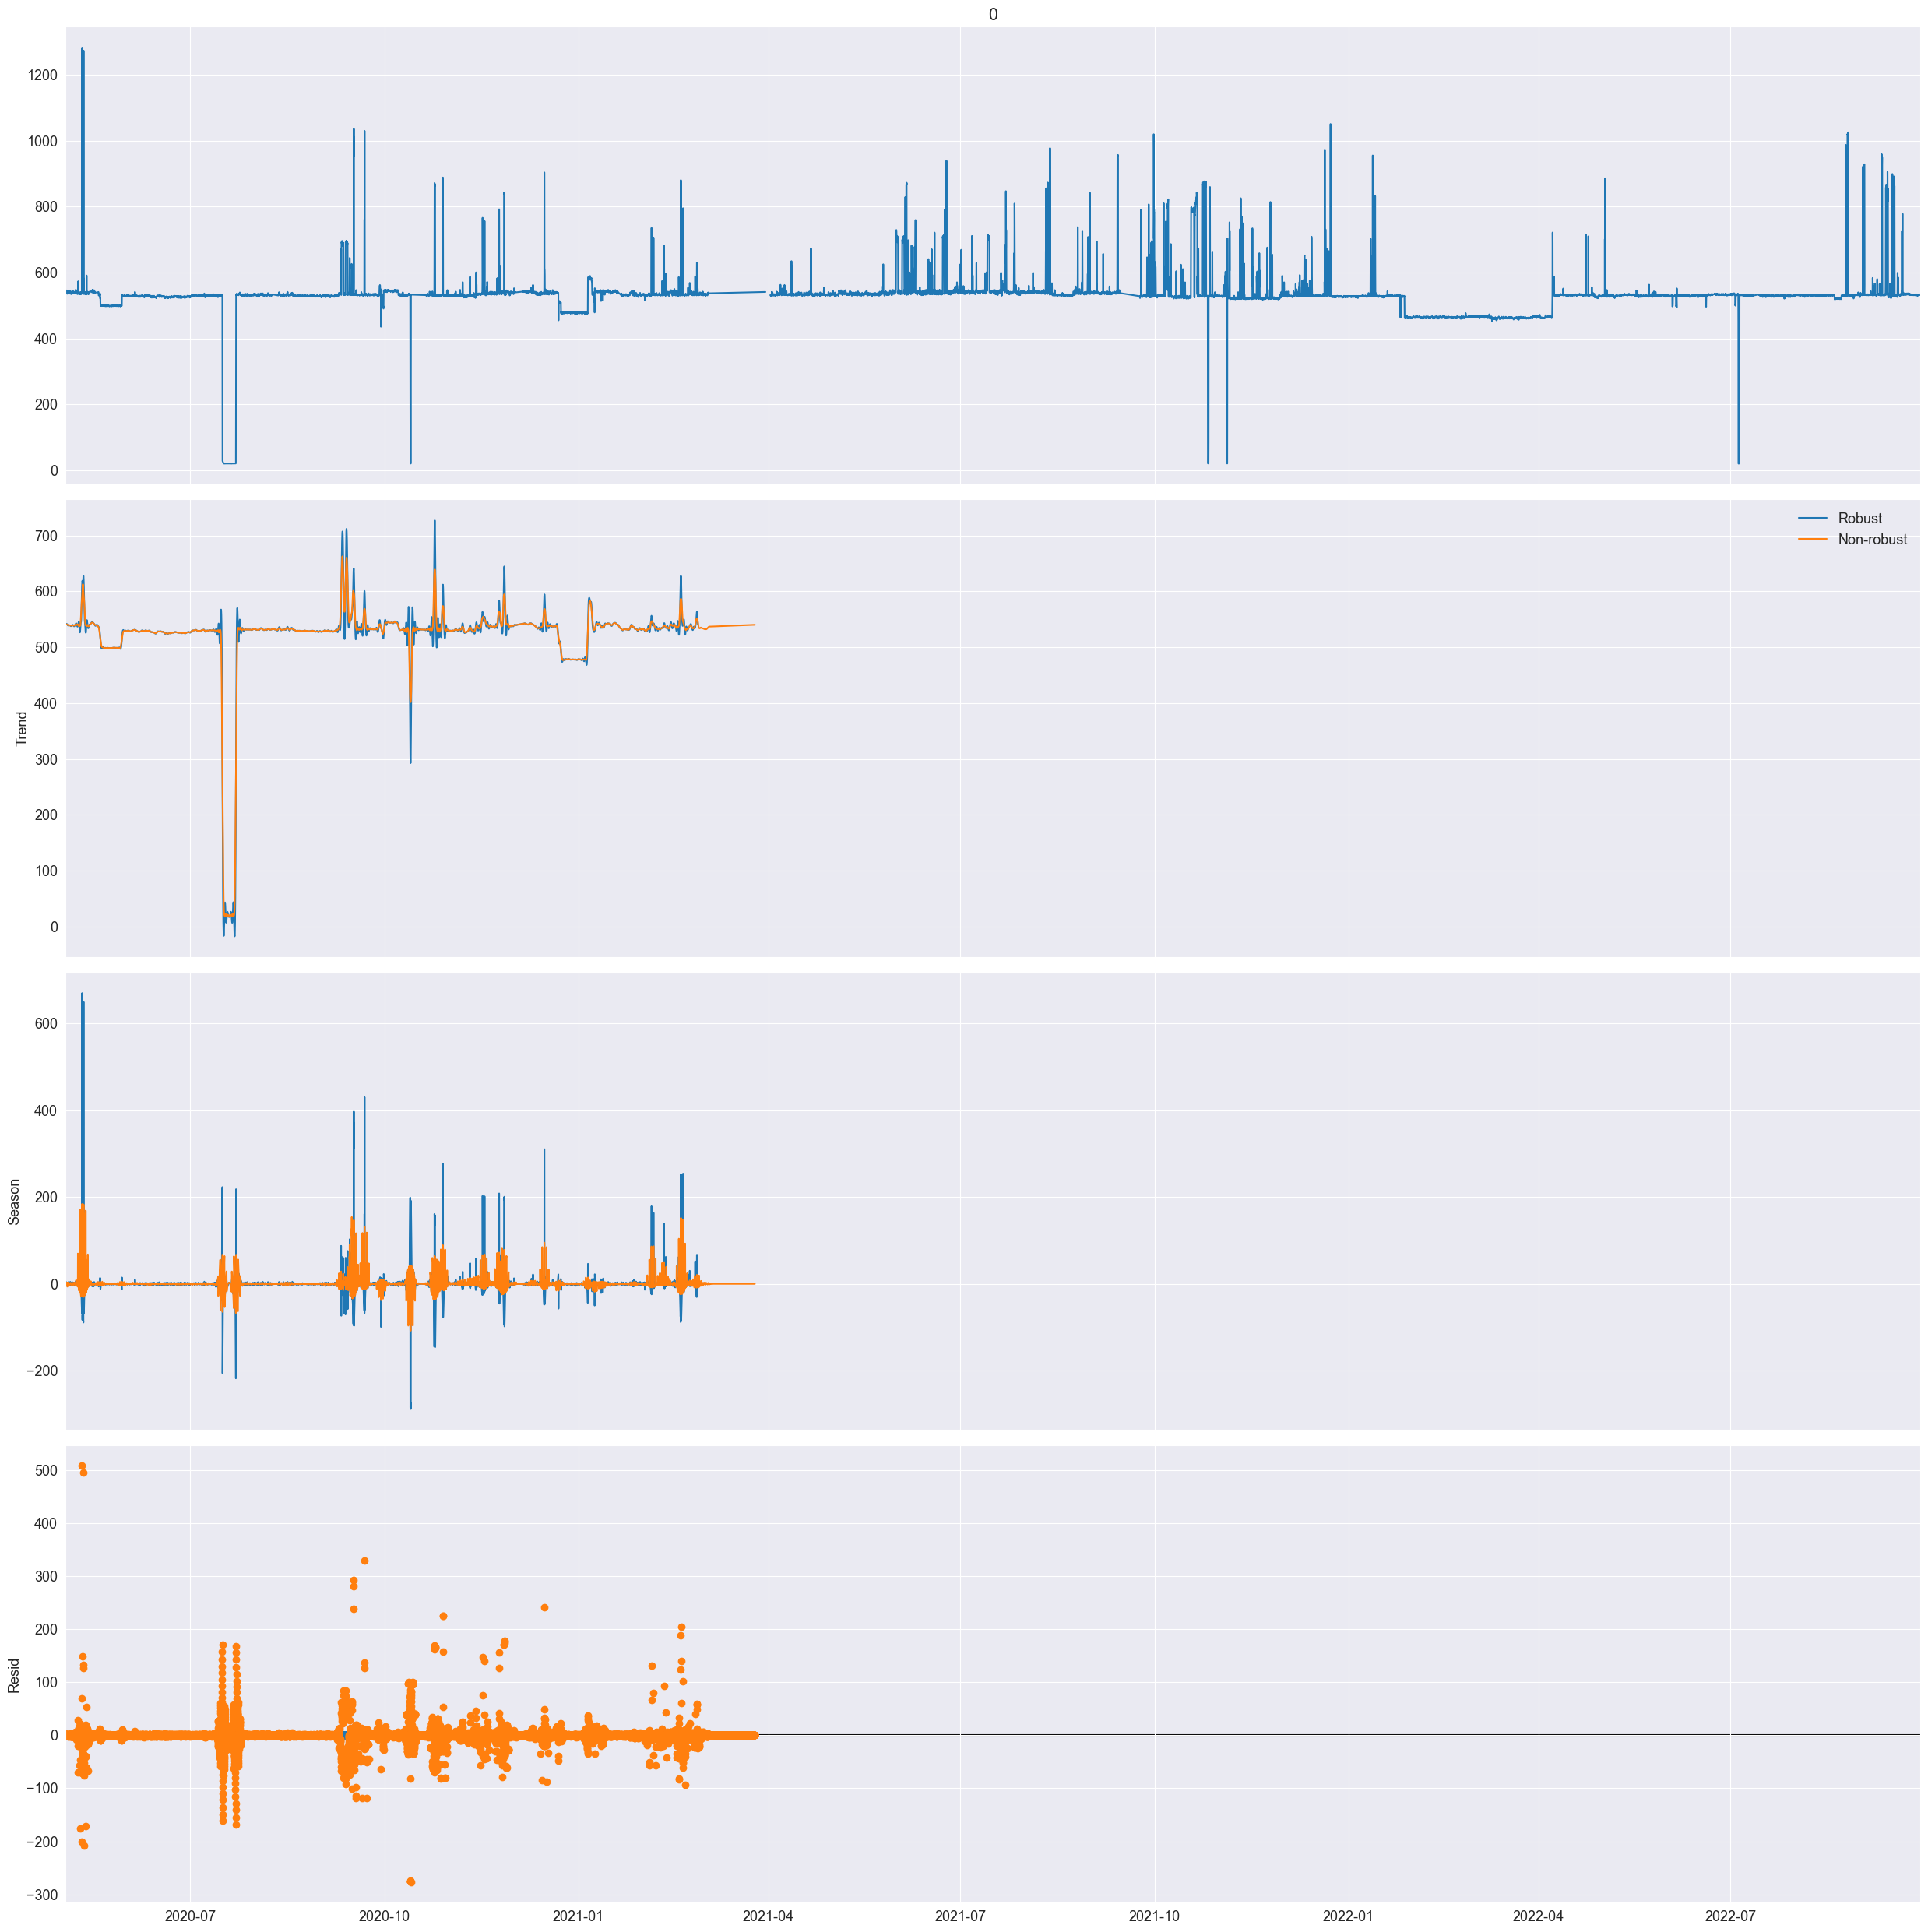

In [6]:
# Seasonal-Trend Decomposition for 2.5 years dataset
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_P['0'], period=24, robust=True)  # the period is set to one day
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_P['0'], period=24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

<Axes: xlabel='timestamp'>

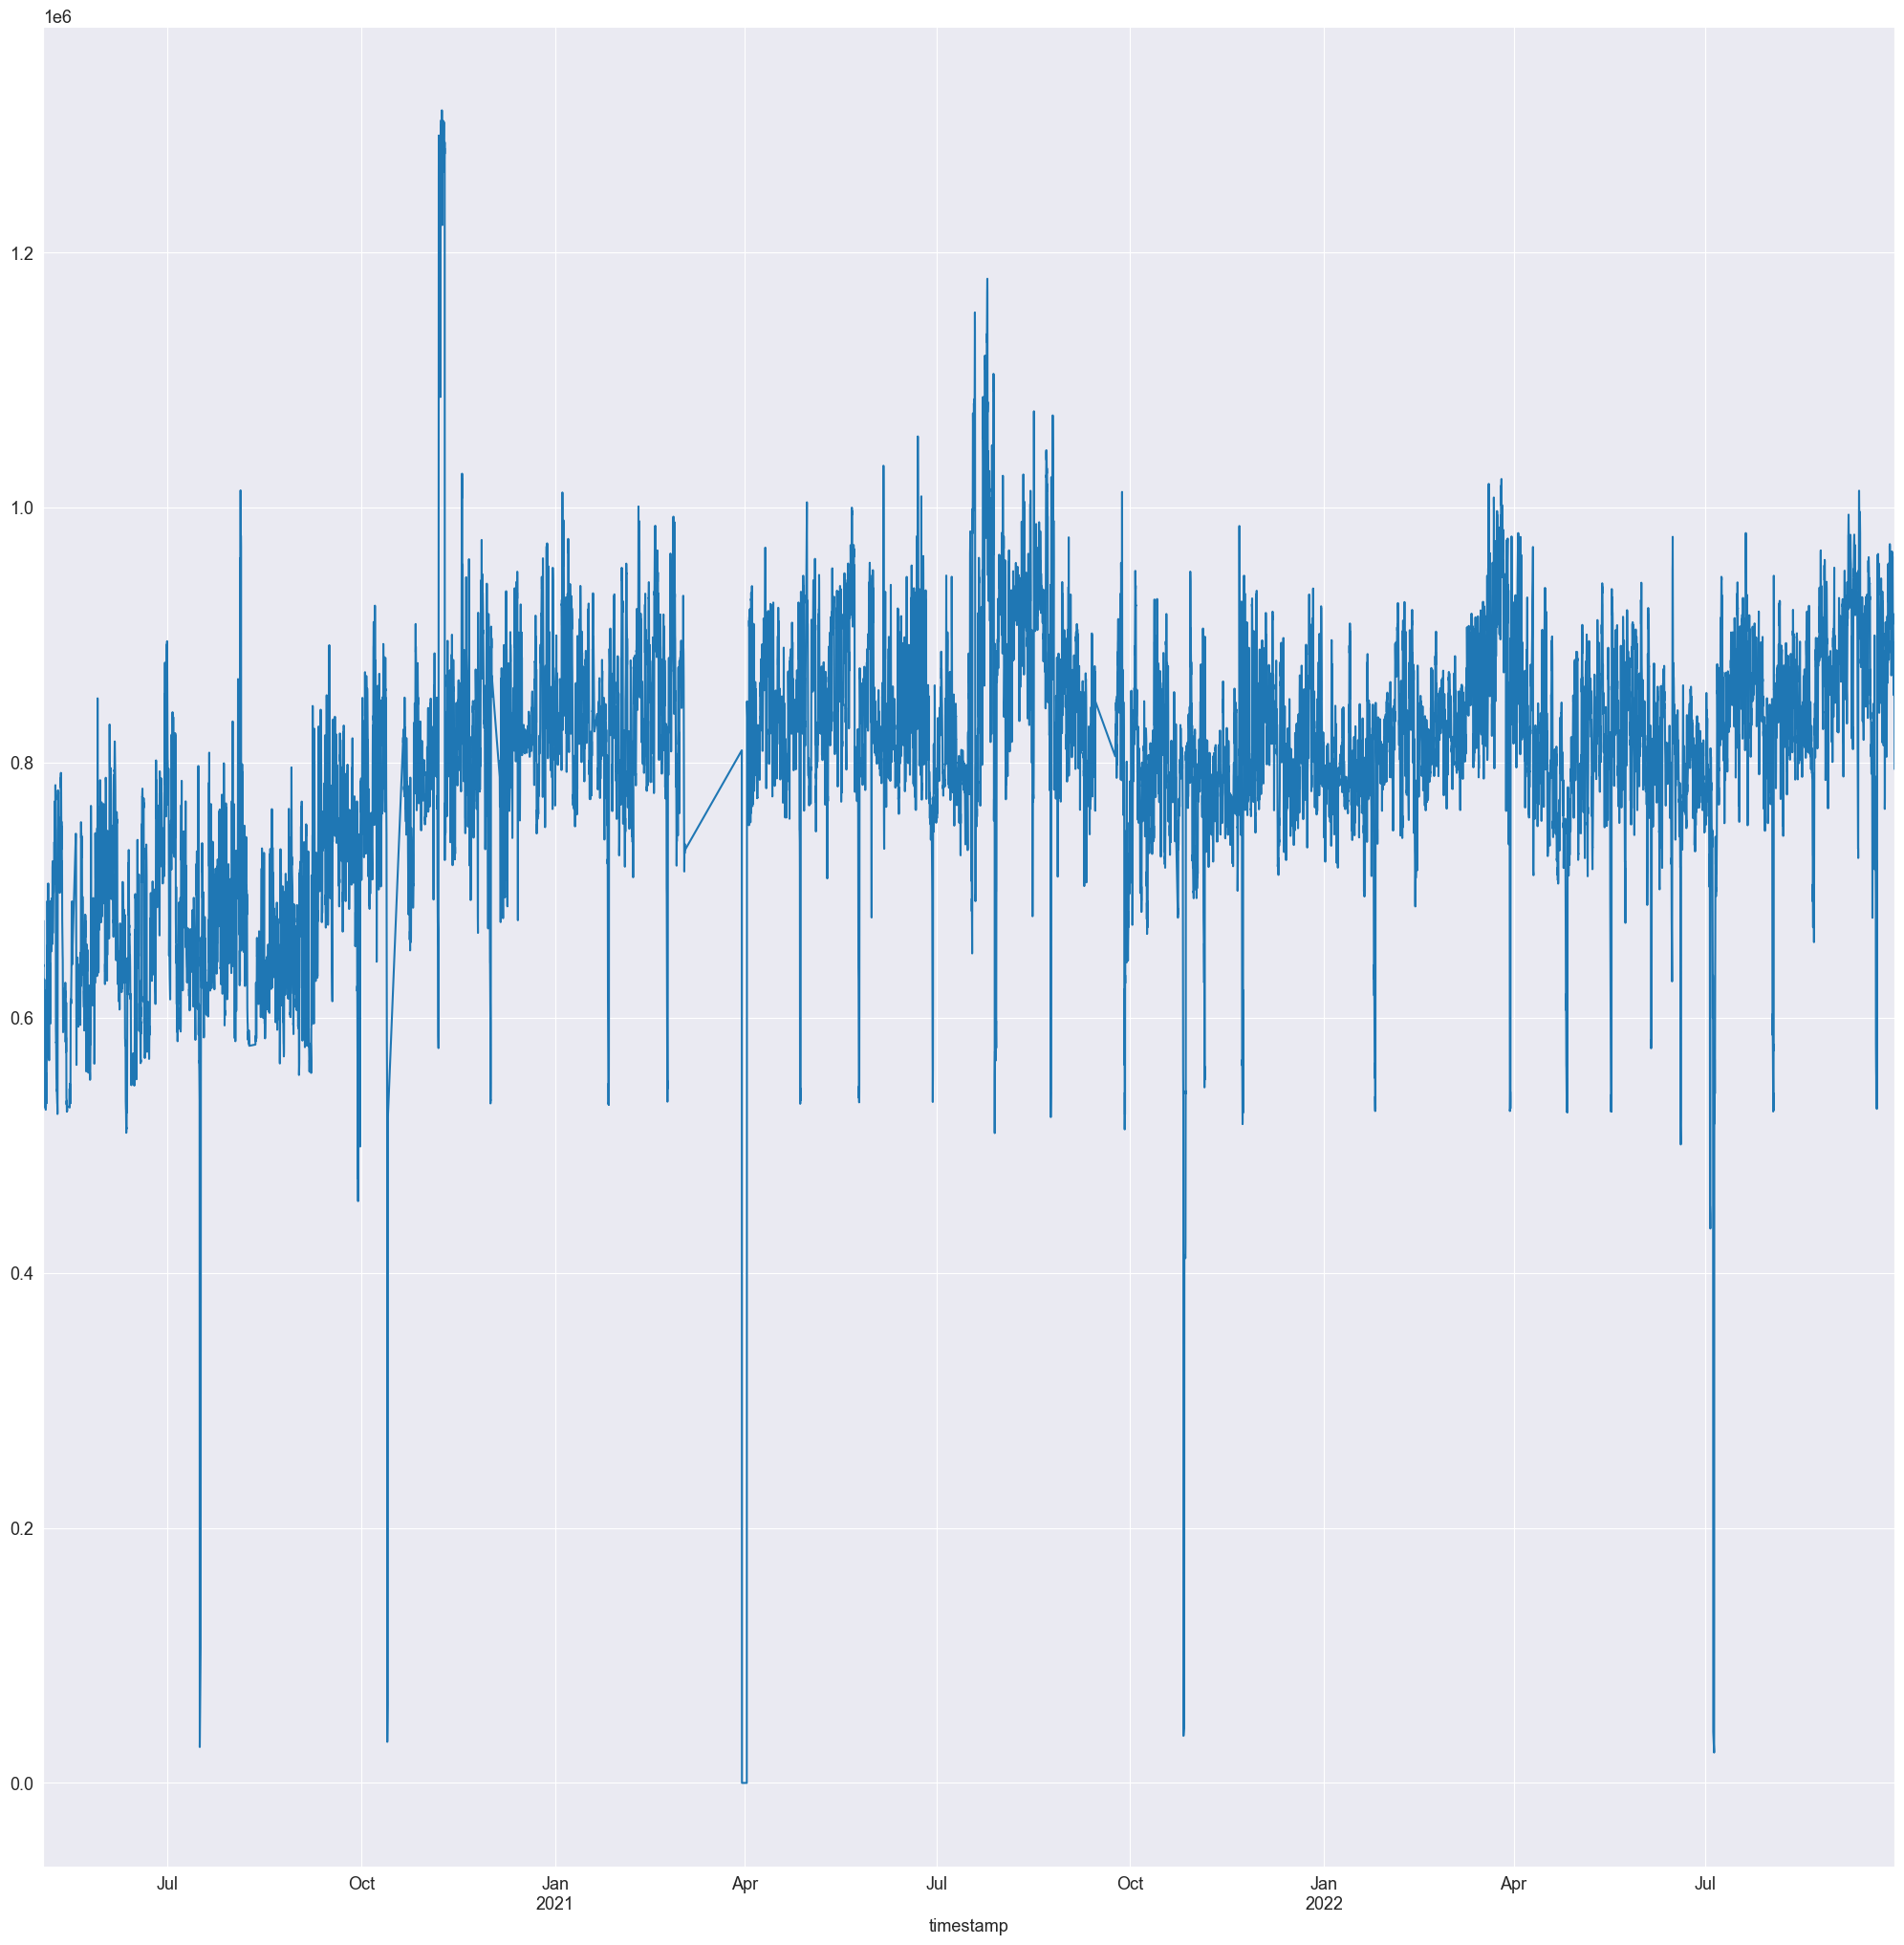

In [7]:
# To get (and plot) the total power consumption for all nodes, each sample of time
dataset_P.sum(axis=1).plot()